<a href="https://colab.research.google.com/github/harichselvamc/toonify/blob/main/ghibli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to Generate Ghibli-Style Image
1. **Set Up Runtime:**
   - Go to **Runtime** > **Change runtime type** and choose **Tesla T4** for GPU processing.

2. **Upload Image:**
   - Click on the upload button to upload an image of your choice.

3. **Adjust Strength:**
   - The strength parameter controls the intensity of the transformation. Set it between **0.3** and **0.8** (default is 0.5). You can experiment with values for different styles!

4. **Generate Image:**
   - After uploading and setting the strength, the notebook will process and generate a Ghibli-style portrait.

5. **Download Image:**
   - Once processed, the image will automatically download to your device.

6. **Follow me on GitHub:**
   - [Follow me on GitHub for more cool projects!](https://github.com/harichselvamc)



In [ ]:
!pip install diffusers torch matplotlib Pillow google-colab -q


GPU is available!
Loading model...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded!


Saving OIP.jpg to OIP (4).jpg


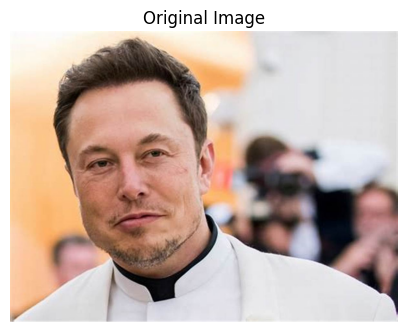

Generating image...


  0%|          | 0/30 [00:00<?, ?it/s]

Image generated in 4.93 seconds!


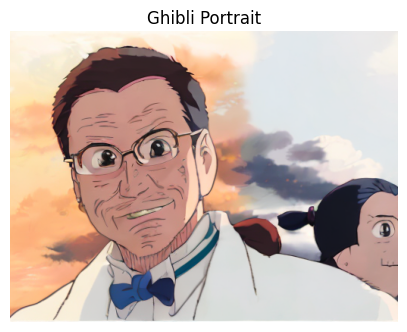

Image saved as ghibli_portrait_OIP (4).jpg!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import time
from google.colab import files

# Load model function
def load_model():
    model_id = "nitrosocke/Ghibli-Diffusion"
    dtype = torch.float16 if torch.cuda.is_available() else torch.float32
    print("Loading model...")
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=dtype)
    pipe.to("cuda" if torch.cuda.is_available() else "cpu")
    pipe.enable_attention_slicing()  # Optimize memory usage
    print("Model loaded!")
    return pipe

# Function to generate Ghibli-style image
def generate_ghibli_image(image, pipe, strength):
    image = image.convert("RGB")
    width, height = image.size

    # Calculate new dimensions to maintain aspect ratio but fit within 512x512
    ratio = min(512/width, 512/height)
    new_width = int(width * ratio)
    new_height = int(height * ratio)

    image = image.resize((new_width, new_height))

    prompt = "a Highly detailed, Studio Ghibli-style animated portrait with soft colors, detailed backgrounds, and whimsical elements similar to scenes in 'Spirited Away' or 'My Neighbor Totoro'."
    print("Generating image...")
    start_time = time.time()
    result = pipe(prompt=prompt, image=image, strength=strength).images[0]
    print(f"Image generated in {time.time() - start_time:.2f} seconds!")
    return result

# Check for GPU availability
gpu_info = "GPU is available!" if torch.cuda.is_available() else "Warning: GPU not available. Processing will be slow."
print(gpu_info)

# Load the model
pipe = load_model()

# Upload the image file
uploaded = files.upload()

# Get the uploaded file path
image_path = next(iter(uploaded))
image = Image.open(image_path)

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


strength = 0.6
strength = max(0.3, min(0.8, strength))  # Clamp between 0.3 and 0.8

# Generate and display the Ghibli-style portrait
result_img = generate_ghibli_image(image, pipe, strength)

plt.figure(figsize=(5, 5))
plt.imshow(result_img)
plt.title("Ghibli Portrait")
plt.axis('off')
plt.show()

# Save the output image
output_filename = f"ghibli_portrait_{image_path.split('/')[-1]}"
result_img.save(output_filename)
print(f"Image saved as {output_filename}!")

# Trigger the download
files.download(output_filename)
